In [2]:
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from keras import models, layers
import keras, os
import numpy as np
import pandas as pd
from keras.applications import VGG19
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

2024-04-25 01:17:22.749442: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/adrianabrazon/Documents/IronHack/final_project/.venv/lib/python3.8/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = VGG19(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

In [4]:
def extract_feature_vector(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    image = np.expand_dims(image, axis=0)
    feature_vector = model.predict(image)
    return feature_vector.flatten()

In [15]:
folder_path = '/Users/adrianabrazon/Documents/IronHack/final_project/images'
given_image_path = '/Users/adrianabrazon/Documents/IronHack/final_project/given_images/img_1066_720.jpeg'
given_feature_vector = extract_feature_vector(given_image_path)
image_similarity_scores = {}
for filename in os.listdir(folder_path)[:500]:
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(folder_path, filename)
        feature_vector = extract_feature_vector(image_path)
        similarity_score = cosine_similarity([given_feature_vector], [feature_vector])[0][0]
        image_similarity_scores[filename] = similarity_score
top_5_similar_images = sorted(image_similarity_scores.items(), key=lambda x: x[1], reverse=True)[:5]

1/1 [==============================] - 0s 414ms/step


In [16]:
## Now testing with a random pick of files

# folder_path = '/Users/adrianabrazon/Documents/IronHack/final_project/images'
# given_image_path = '/Users/adrianabrazon/Documents/IronHack/final_project/given_images/img_1066_720.jpeg'
# given_feature_vector = extract_feature_vector(given_image_path)

# # Get list of filenames from the folder path
# filenames = os.listdir(folder_path)

# # Shuffle the list of filenames
# np.random.shuffle(filenames)

# image_similarity_scores = {}
# for filename in filenames[:10]:
#     if filename.endswith(('.jpg', '.png', '.jpeg')):
#         image_path = os.path.join(folder_path, filename)
#         feature_vector = extract_feature_vector(image_path)
#         similarity_score = cosine_similarity([given_feature_vector], [feature_vector])[0][0]
#         image_similarity_scores[filename] = similarity_score
# top_5_similar_images = sorted(image_similarity_scores.items(), key=lambda x: x[1], reverse=True)[:5]

In [17]:
print(top_5_similar_images)

[('19186896.jpg', 0.650436), ('20182412.jpg', 0.6267916), ('20288022.jpg', 0.61455977), ('18820387.jpg', 0.6080719), ('20223567.jpg', 0.6071993)]


In [18]:
recommended_id1=[]

for i in range(len(top_5_similar_images)):
    id_=int(top_5_similar_images[i][0].replace('.jpg',''))
    # print(id_)
    recommended_id1.append(id_)
print(recommended_id1)

[19186896, 20182412, 20288022, 18820387, 20223567]


In [19]:
# we load the DataFrame from which we will recommend dogs in adoption from: 

df = pd.read_csv('/Users/adrianabrazon/Documents/IronHack/final_project/dog_files/pets_for_adoption.csv')

In [20]:
df

,doggo_name,doggo_pic_url,doggo_url,animal_id
0,Keisha,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19921455
1,Mayflower,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20026683
2,George,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19628021
3,Billie,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20109890
4,Henry,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20109891
...,...,...,...,...
19986,JC Penny,https://cdn.rescuegroups.org/4598/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19613415
19987,Nate,no photo,https://www.aspca.org/adopt-pet/adoptable-dogs...,19627552
19988,Rocket,https://cdn.rescuegroups.org/4598/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19628000
19989,Hunter,https://cdn.rescuegroups.org/4598/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19642640


In [21]:
# recommended_images = {}
# recommended_images['123.jpg'] = 0.3456
# recommended_images['124.jpg'] = 0.3342
# recommended_images['125.jpg'] = 0.3156
# # recommended_images['126.jpg'] = 0.3023

# for i in range(len(image_similarity_scores)):
#     recommended_id1 = list(list(image_similarity_scores.keys())[i].split(".")[0])

In [22]:
# for i in range(0,5):
#     filtered_df = df[df['animal_id']==recommended_id1[i]]
#     filtered_df
#     display(filtered_df)

In [23]:
# model.trainable = False

# flat1 = model.layers[-1].output

# class1 = layers.Dense(64, activation='relu')(flat1)

# outputs = tf.keras.layers.Dense(36, activation='softmax')(class1)

# inputs = model.input

# model_vgg19 = tf.keras.Model(inputs=inputs, outputs=outputs)

# model_vgg19.compile(
#     loss='categorical_crossentropy',
#     optimizer='adam',
#     metrics=['accuracy']
# )

# model_vgg19.summary()

In [27]:
# Initialize an empty DataFrame to store filtered results
filtered_df = pd.DataFrame()

# Iterate over the recommended IDs and filter the DataFrame
for i in range(0, 5):
    filtered_rows = df[df['animal_id'] == recommended_id1[i]]
    # Add a column to store the similarity score
    filtered_rows['VGG19_similarity_score'] = top_5_similar_images[i][1]
    filtered_df = pd.concat([filtered_df, filtered_rows])

# Display the filtered DataFrame
display(filtered_df)

,doggo_name,doggo_pic_url,doggo_url,animal_id,VGG19_similarity_score
75,Violet (TX),https://cdn.rescuegroups.org/7015/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19186896,0.650436
905,Milo Lizman,https://cdn.rescuegroups.org/956/pictures/anim...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20182412,0.626792
318,Thelma,https://cdn.rescuegroups.org/6296/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20288022,0.614560
520,Candy,https://cdn.rescuegroups.org/7701/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,18820387,0.608072
389,Darla,https://cdn.rescuegroups.org/9840/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20223567,0.607199


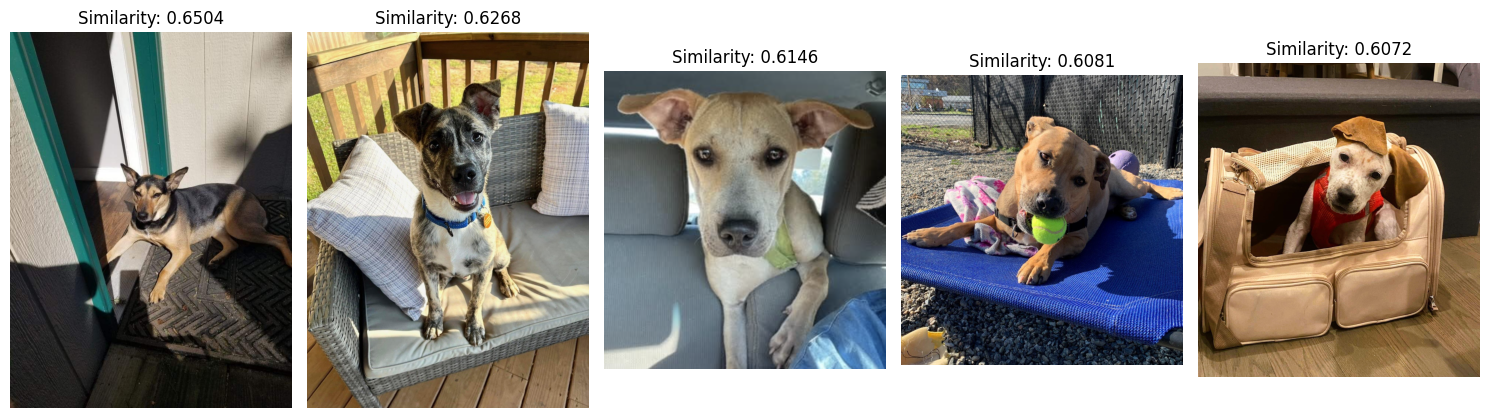

In [26]:
plt.figure(figsize=(15, 10))
for i, (filename, similarity_score) in enumerate(top_5_similar_images):
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(f"Similarity: {similarity_score:.4f}")
    plt.axis('off')
plt.tight_layout()
plt.show()